# Business Formation Trends Analysis

This project explores Business Formation Statistics to understand how business activity varies over time, category, data type, and geography.

The goal is not to make precise forecasts, but to identify patterns that could help analysts and decision-makers understand changes in business formation activity.

In [8]:
import os
import csv
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

## Data Loading

The dataset used in this project comes from the U.S. Business Formation Statistics (BFS).
It contains time-based indicators of business activity across industries, regions, and data types.

In [9]:
df = pd.read_csv(
    "BFS-mf.csv",
    skiprows=381,       # jump past metadata to the DATA header rows
    engine="python",
    sep=",",
    quoting=csv.QUOTE_NONE,
    on_bad_lines="skip"
)

df.columns = df.columns.str.strip()
df.head(), df.columns

(   per_idx  cat_idx  dt_idx  geo_idx  is_adj     val
 0        7        1       1        1       0  166448
 1        8        1       1        1       0  171070
 2        9        1       1        1       0  162742
 3       10        1       1        1       0  207389
 4       11        1       1        1       0  176104,
 Index(['per_idx', 'cat_idx', 'dt_idx', 'geo_idx', 'is_adj', 'val'], dtype='object'))

In [10]:
df.shape, df.columns

((407592, 6),
 Index(['per_idx', 'cat_idx', 'dt_idx', 'geo_idx', 'is_adj', 'val'], dtype='object'))

## Exploratory Data Analysis

We look at the distribution of the target value (`val`) to understand scale and skewness.

In [11]:
df["val"].describe()

,val
count,407592
unique,27301
top,D
freq,5988


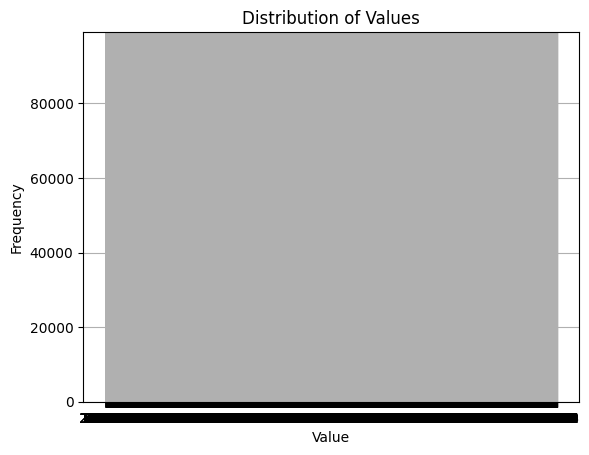

In [12]:
df["val"].hist(bins=30)
plt.title("Distribution of Values")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

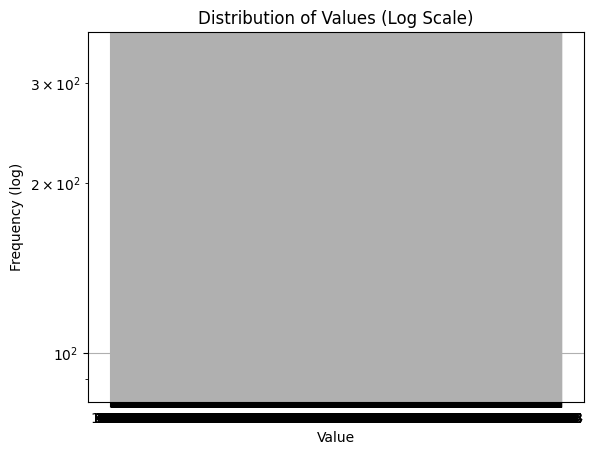

In [13]:
df["val"].sample(5000, random_state=42).hist(bins=30)
plt.yscale("log")
plt.title("Distribution of Values (Log Scale)")
plt.xlabel("Value")
plt.ylabel("Frequency (log)")
plt.show()

## Data Preparation

We select the modeling columns, convert to numeric, and drop missing values.

In [14]:
model_df = df[["per_idx", "cat_idx", "dt_idx", "geo_idx", "is_adj", "val"]].copy()

for col in model_df.columns:
    model_df[col] = pd.to_numeric(model_df[col], errors="coerce")

model_df = model_df.dropna()
model_df.shape

(401552, 6)

## Predictive Model

A simple linear regression model is used as a baseline to estimate `val` from the available identifiers.

In [15]:
X = model_df[["per_idx", "cat_idx", "dt_idx", "geo_idx", "is_adj"]]
y = model_df["val"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)

"Model trained"

'Model trained'

In [16]:
y_pred = model.predict(X_test)

print("R2:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

R2: 0.07543632763497743
MSE: 198944267.8929486


## Example Prediction Scenario

To show how the model can be used, we pass one real example row into the trained model and generate a predicted value.

In [17]:
example = X_test.iloc[[0]]
prediction = model.predict(example)[0]
prediction

np.float64(4078.2560587527387)